In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the time series data
data = pd.read_csv('/kaggle/input/egg-sales-of-a-local-shop-for-30-years/train_egg_sales.csv', sep = ';')
#data1 = pd.read_csv('/kaggle/input/egg-sales-of-a-local-shop-for-30-years/test_egg_sales.csv')

In [3]:
data.head()

,Date,Egg Sales
0,1993-01-01,91
1,1993-01-02,124
2,1993-01-03,112
3,1993-01-04,115
4,1993-01-05,107


In [4]:
data.describe()

,Egg Sales
count,10592.000000
mean,366.326095
std,155.202620
min,0.000000
25%,235.000000
50%,366.000000
75%,499.000000
max,713.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       10592 non-null  object
 1   Egg Sales  10592 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 165.6+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10592 non-null  datetime64[ns]
 1   Egg Sales  10592 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 165.6 KB


In [8]:
data.index = data['Date'] #In a univariant model, Data Time model should be saved as Index 
data.head()

,Date,Egg Sales
Date,,
1993-01-01,1993-01-01,91
1993-01-02,1993-01-02,124
1993-01-03,1993-01-03,112
1993-01-04,1993-01-04,115
1993-01-05,1993-01-05,107


In [9]:
del data['Date']

In [10]:
data

,Egg Sales
Date,
1993-01-01,91
1993-01-02,124
1993-01-03,112
1993-01-04,115
1993-01-05,107
...,...
2021-12-27,681
2021-12-28,664
2021-12-29,613


<Axes: xlabel='Date'>

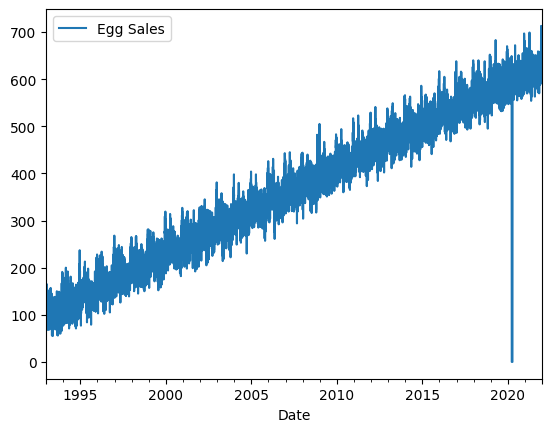

In [11]:
data.plot()

In [12]:
data.isna().sum()

Egg Sales    0
dtype: int64

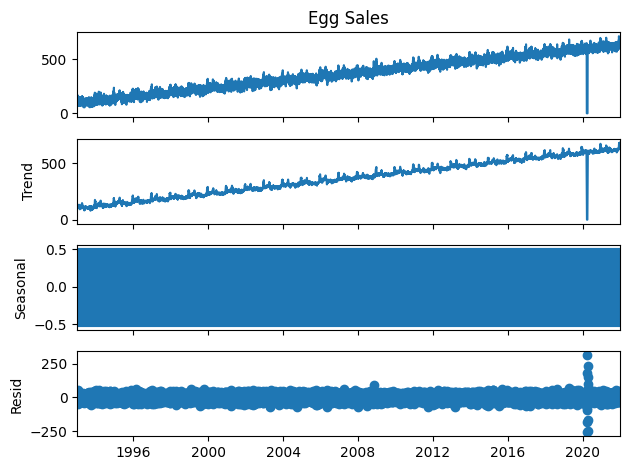

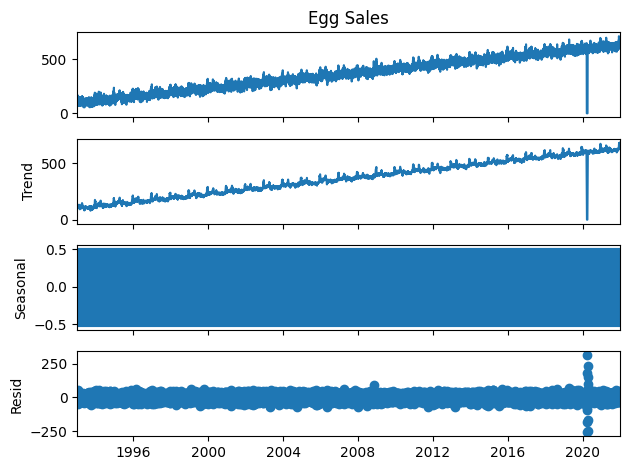

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose #Decompose data into trend, season and error
decompose_result = seasonal_decompose(data['Egg Sales'].dropna())

decompose_result.plot()